In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [38]:
print(df['price'].isna().sum())

0


In [14]:
# 1.1

frequency_table = df["category"].value_counts()
frequency_table.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [17]:
# 1.2

top_10_categories = df["category"].value_counts().head(10)
top_10_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

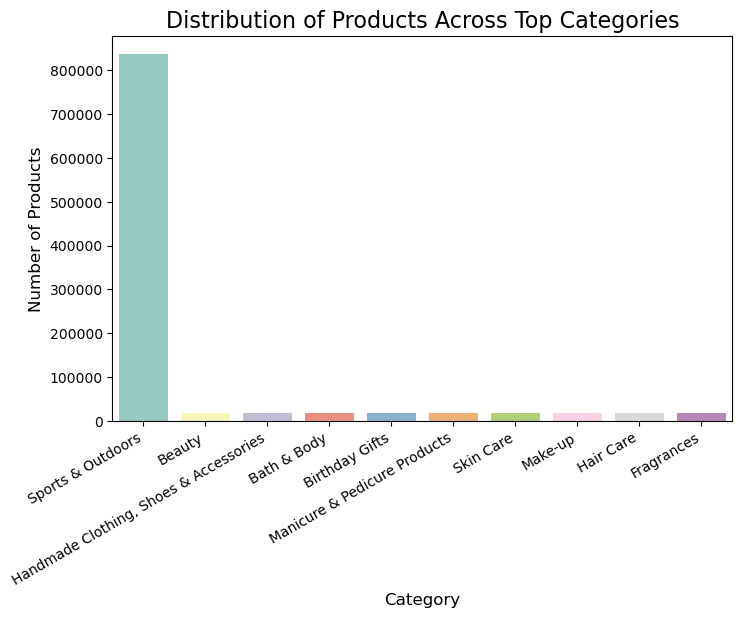

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_10_categories.index,
    y=top_10_categories.values,
    palette="Set3",
    hue=top_10_categories.index,  
    dodge=False
)
plt.legend([], [], frameon=False) 
plt.title("Distribution of Products Across Top Categories", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.show()

In [28]:
# 2.1.1

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [29]:
# 2.1.2

if mean_price > mode_price:
    print(f"the average price ({mean_price}) is higher than the most common price ({mode_price})")
elif mean_price < mode_price:
    print(f"the average price ({mean_price})is lower than the most common price ({mode_price})")
else:
    print(f"the average price ({mean_price})is equal to the most common price ({mode_price})")

the average price (89.24380943923663) is higher than the most common price (9.99)


In [30]:
# 2.2.1

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.4853225653,
 345.6088617535223,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [ ]:
# 2.2.2

# the high value in range can be an indicator for outliers


In [39]:
# 3

df_cleaned = df[df['price'] > 0]
df_cleaned

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


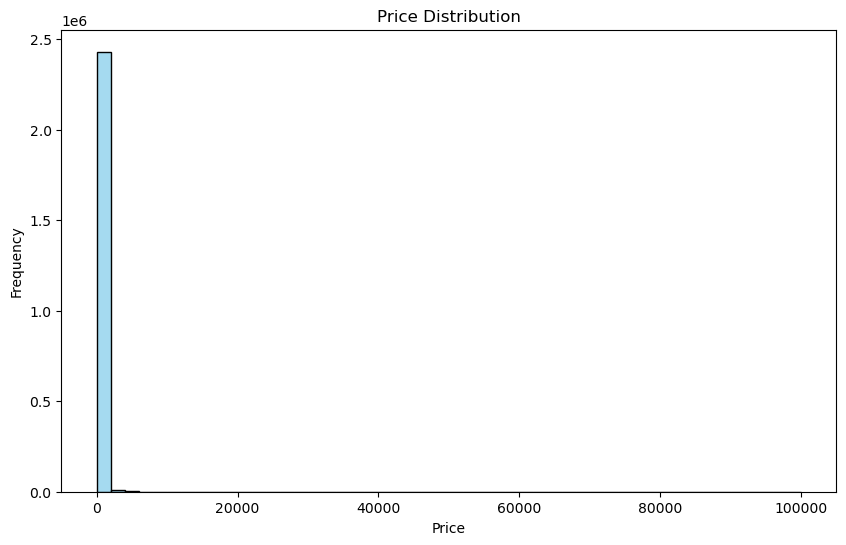

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, color="skyblue")
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

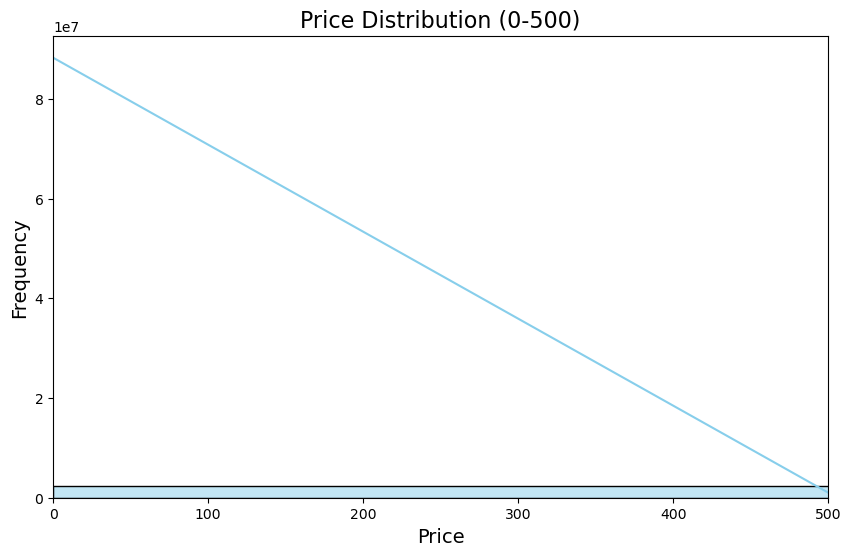

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=30, kde=True, color="skyblue")
plt.xlim(0, 500)
plt.title('Price Distribution (0-500)', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

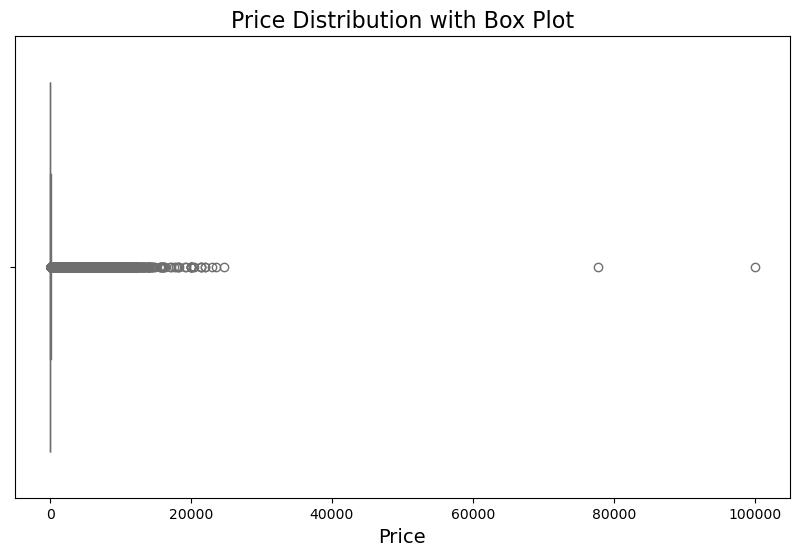

In [52]:
# 2.3.2

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['price'], color="skyblue")
plt.title('Price Distribution with Box Plot', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.show()

In [56]:
# 3.1.1

mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]

mean_stars, median_stars, mode_stars

(2.152836472966065, 0.0, 0.0)

In [57]:
# 3.1.2 

# the common trend is to rate 0 (dont rating)

mode_stars

0.0

In [58]:
# 3.2.1

variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

variance_stars, std_dev_stars, min_stars, max_stars, range_stars, quantiles_stars

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [ ]:
# 3.2.2

# variance - is high - it means the variation of values in ratings is high
# standard dev - is high - it means the ratings are mixed between high an low values (spreaded out)
# Q1 25% of products have ratings equal or lower to 0
# Q2 50% of products have ratings equal or lower to 0
# Q3 75% of products are below 4.4


In [59]:
# 3.3.1

skewness_stars = df['price'].skew()
kurtosis_stars = df['price'].kurtosis()

skewness_stars, kurtosis_stars

(27.492977566280338, 4241.616412866518)

In [ ]:
# 3.3.2

# ver high and positive skewness - right skewed
# kurtosis is very high - there are extreme outliers!

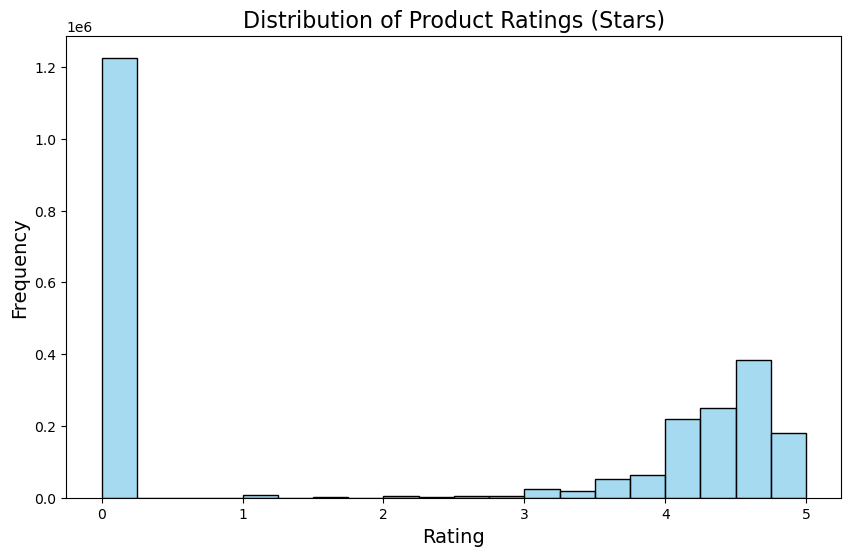

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Ratings (Stars)', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

<Axes: xlabel='stars', ylabel='Count'>

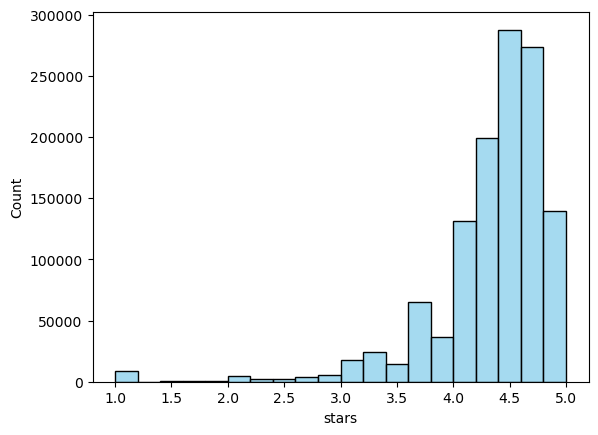

In [61]:
df_cleaned_ratings = df[df['stars'] > 0]

sns.histplot(df_cleaned_ratings['stars'], bins=20, kde=False, color='skyblue', edgecolor='black')